Created on Sat Feb 16 23:19:26 2019<br>
@author: github.com/gskdhiman

### Load the Necessary libraries

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import eli5
from eli5.sklearn import PermutationImportance
%matplotlib inline


In [4]:
# filepath of the dataset
file_path = os.path.join('..','dataset','airq402.dat.txt')

In [5]:
#column names of the dataset
col_names = ['City1','City2','Average Fare','Distance','Average weekly passengers',
             'market leading airline','MLA_market_share','MLA_Average_fare',
             'Low price airline','LPA_market_share','LPA_price']

In [6]:
#load the dataset into pandas dataframe
df= pd.read_csv(file_path,sep='\s+',header = None,names = col_names)

In [7]:
#lets see 5 rows of the data
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,MLA_market_share,MLA_Average_fare,Low price airline,LPA_market_share,LPA_price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [8]:
df.describe()

,Average Fare,Distance,Average weekly passengers,MLA_market_share,MLA_Average_fare,LPA_market_share,LPA_price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [9]:
#check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
MLA_market_share             1000 non-null float64
MLA_Average_fare             1000 non-null float64
Low price airline            1000 non-null object
LPA_market_share             1000 non-null float64
LPA_price                    1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [10]:
#see how many categories are there in the categorical variables
city1_unique = df['City1'].value_counts()
print('No. of unique cities in \'City1\' column: {0}'.format(len(city1_unique)))
city2_unique = df['City2'].value_counts()
print('No. of unique cities in \'City2\' column: {0}'.format(len(city2_unique)))
market_lead_al_unique = df['market leading airline'].value_counts()
print('No. of unique airlines in \'market leading airline\' column: {0}'.format(len(market_lead_al_unique)))
low_price_al_unique = df['Low price airline'].value_counts()
print('No. of unique airlines in \'Low price airline\' column: {0}'.format(len(low_price_al_unique)))

No. of unique cities in 'City1' column: 90
No. of unique cities in 'City2' column: 85
No. of unique airlines in 'market leading airline' column: 16
No. of unique airlines in 'Low price airline' column: 19


## lets see the correlation of dataset using heatmap

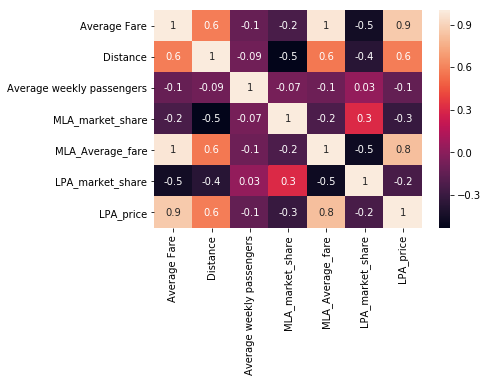

In [11]:
c_matrix = df.corr()
sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

### From the above graph we can see that *MLA_Average_fare* , *LPA_price* and *Distance* are highly correlated with the *Average Fare* column
These three we will use definitely use in the final prediction.<br>

#### Lets dig deep into finding the relation b/w others

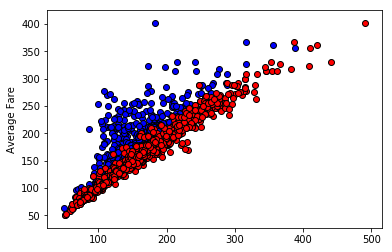

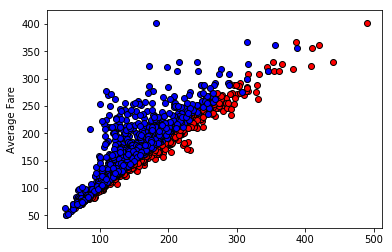

In [12]:
#lets plot the highly correlated columns in the scatter plot together
plt.scatter(df['LPA_price'],df['Average Fare'],color = 'blue',edgecolors = 'black')
plt.scatter(df['MLA_Average_fare'],df['Average Fare'],color = 'red',edgecolors = 'black')
plt.ylabel('Average Fare')
plt.show()

plt.scatter(df['MLA_Average_fare'],df['Average Fare'],color = 'red',edgecolors = 'black')
plt.scatter(df['LPA_price'],df['Average Fare'],color = 'blue',edgecolors = 'black')
plt.ylabel('Average Fare')
plt.show()

Plotted the above two graphs for the same data just to see the overlapping data

Observation: From the graph also, we can see they are correated


### Lets see the catogrical variables now

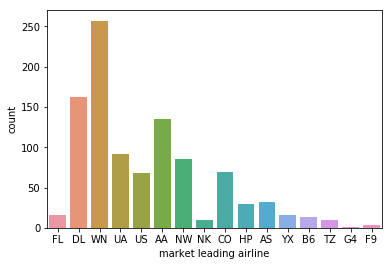

In [13]:
#count of categories in the market leading airlines
sns.countplot(x="market leading airline", data=df)

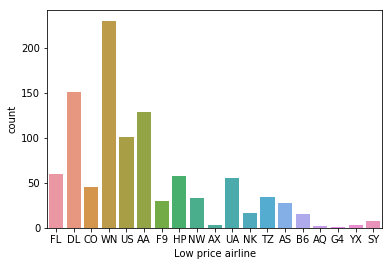

In [14]:
#count of categories in the low price airlines column
sns.countplot(x="Low price airline", data=df)

### Lets try to reduce the number of categorical variables

###### we will use the following function to replace low frequency terms with other 

In [15]:
#inplace replace
def replace_low_freq(data,threshold):
    value_count = data.value_counts()
    value_count = value_count[value_count < threshold].index
    data.replace({x:'Other' for x in value_count},inplace = True)

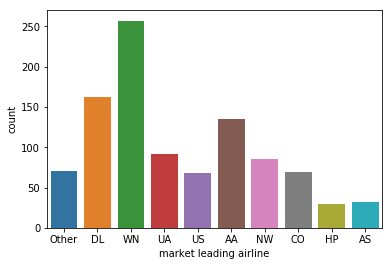

In [16]:
threshold = 25
replace_low_freq(df['market leading airline'],threshold)
sns.countplot(x="market leading airline", data=df)

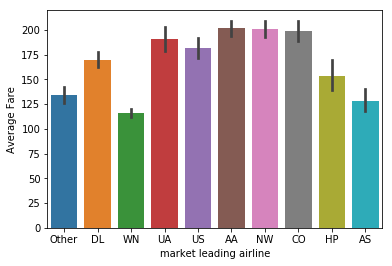

In [17]:
#lets see now the relation between the market leading airline and average fare
sns.barplot(x="market leading airline", y='Average Fare', data=df)

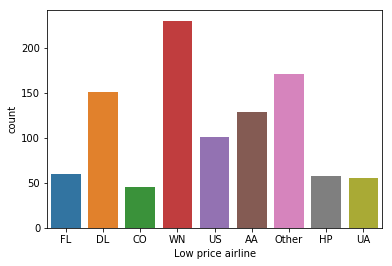

In [18]:
#lets reduce the categories of the low price airlines column now
threshold = 40
replace_low_freq(df['Low price airline'],threshold)
sns.countplot(x="Low price airline", data=df)

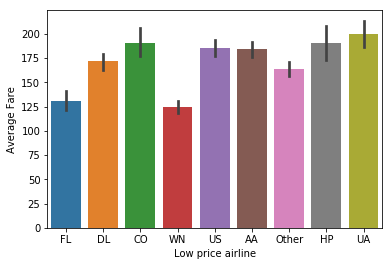

In [19]:
sns.barplot(x="Low price airline", y='Average Fare', data=df)

### Lets see the correlation between the Low price airlines and the avearge fare after using the one hot encoding technique.

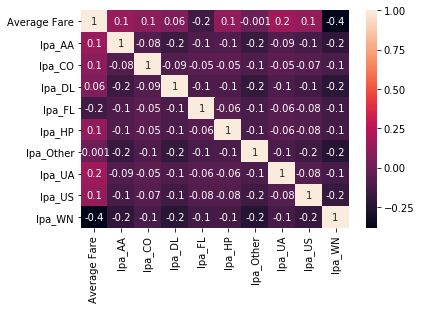

In [20]:
df_temp = df[['Low price airline','Average Fare']]

df_temp = pd.get_dummies(df_temp, columns=['Low price airline'], prefix = ['lpa'])
c_matrix = df_temp.corr()
x = sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

#### Lets take the highly correlated ones

In [21]:
#data to be taken from using the above graph
ohe_data_from_lpa = df_temp[['lpa_UA']]
#put the data into main df
df['lpa_UA'] = ohe_data_from_lpa

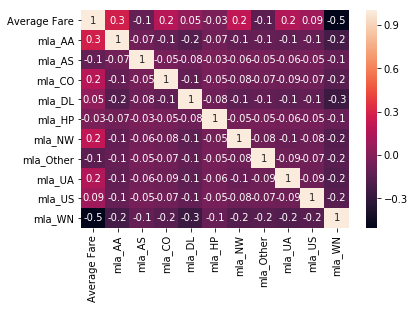

In [22]:
df_temp2 = df[['market leading airline','Average Fare']]
df_temp2 = pd.get_dummies(df_temp2, columns=['market leading airline'], prefix = ['mla'])
c_matrix = df_temp2.corr()
x= sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

#### Lets take the highly correlated ones

In [23]:
#data to be taken from using the above graph
ohe_data_from_lpa = df_temp2[['mla_AA','mla_CO','mla_NW','mla_UA']]
#put the data into main df
df = pd.concat([df, ohe_data_from_lpa], axis=1, join_axes=[df.index])

In [24]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,MLA_market_share,MLA_Average_fare,Low price airline,LPA_market_share,LPA_price,lpa_UA,mla_AA,mla_CO,mla_NW,mla_UA
0,CAK,ATL,114.47,528,424.56,Other,70.19,111.03,FL,70.19,111.03,0,0,0,0,0
1,CAK,MCO,122.47,860,276.84,Other,75.10,123.09,DL,17.23,118.94,0,0,0,0,0
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12,0,0,0,0,0
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86,0,0,0,0,0
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42,0,0,0,0,1


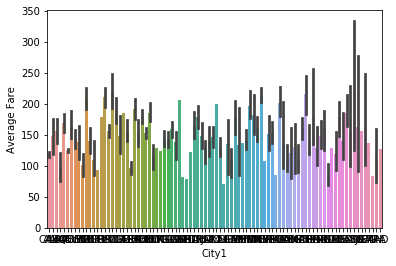

In [25]:
sns.barplot(x="City1", y='Average Fare', data=df)

#### Analysis
The plot does not depict  anything as of now, lets replace the low frequency values with the other

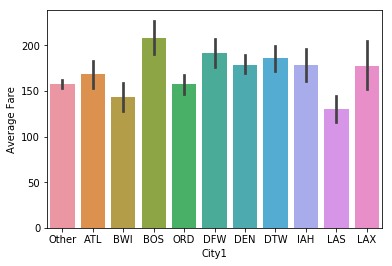

In [26]:
replace_low_freq(df['City1'],30)
sns.barplot(x="City1", y='Average Fare', data=df)

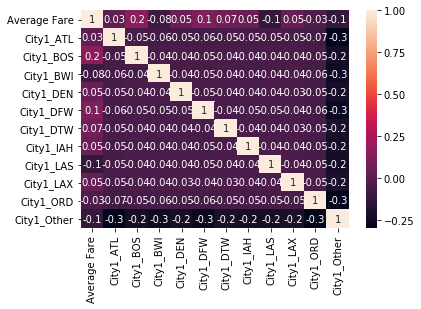

In [27]:
df_temp = df[['City1','Average Fare']]
df_temp = pd.get_dummies(df_temp, columns=['City1'], prefix = ['City1'])
c_matrix = df_temp.corr()
x= sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

### Not much correlation in the city1 and average value, So lets not include City1 in final regression

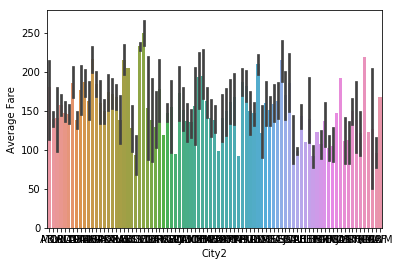

In [28]:
sns.barplot(x="City2", y='Average Fare', data=df)

The plot does not depict anything, lets replace the low frequency with the other

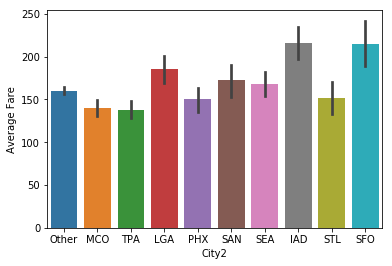

In [29]:
replace_low_freq(df['City2'],30)
sns.barplot(x="City2", y='Average Fare', data=df)

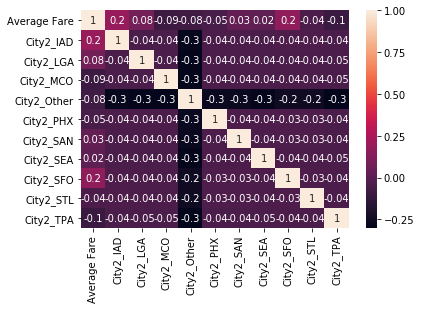

In [30]:
df_temp2 = df[['City2','Average Fare']]
df_temp2 = pd.get_dummies(df_temp2, columns=['City2'], prefix = ['City2'])
c_matrix = df_temp2.corr()
x= sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

In [31]:
#data to be taken from using the above graph
ohe_data_from_city2 = df_temp2[['City2_IAD','City2_SFO']]
#put the data into main df
df = pd.concat([df, ohe_data_from_city2], axis=1, join_axes=[df.index])

In [32]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,MLA_market_share,MLA_Average_fare,Low price airline,LPA_market_share,LPA_price,lpa_UA,mla_AA,mla_CO,mla_NW,mla_UA,City2_IAD,City2_SFO
0,Other,Other,114.47,528,424.56,Other,70.19,111.03,FL,70.19,111.03,0,0,0,0,0,0,0
1,Other,MCO,122.47,860,276.84,Other,75.10,123.09,DL,17.23,118.94,0,0,0,0,0,0,0
2,Other,Other,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12,0,0,0,0,0,0,0
3,Other,Other,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86,0,0,0,0,0,0,0
4,Other,Other,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42,0,0,0,0,1,0,0


### Lets see the relation between the Average value of Market leading airlines and low price airlines of the reduced categories in the same graph.

At most one value per airline for Market leading airlines <br>
At most one value per airline for low price airlines

In [33]:
mla={}
def func(row):
    if row['market leading airline'] not in mla: 
        mla[row['market leading airline']] = [float(row['Average Fare'])]
    else:
        mla[row['market leading airline']].append(float(row['Average Fare']))
    return mla
        
data = df[['market leading airline','Average Fare']].apply(func,axis =1)
mla = {k:sum(list(v))/len(v) for k,v in mla.items()}

In [34]:
lpa ={}
def func(row):
    if row['Low price airline'] not in lpa: 
        lpa[row['Low price airline']] = [float(row['Average Fare'] )]
    else:
        lpa[row['Low price airline']].append(float(row['Average Fare']))
    return lpa
        
data = df[['Low price airline','Average Fare']].apply(func,axis =1)
lpa = {k:sum(list(v))/len(v) for k,v in lpa.items()}

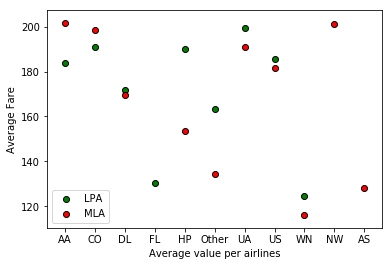

In [35]:
lpa_x = list(lpa.keys())
lpa_y = list(lpa.values())
mla_x = list(mla.keys())
mla_y = list(mla.values())
a = plt.scatter(lpa_x,lpa_y,color= 'green',edgecolors = 'black')
b = plt.scatter(mla_x,mla_y,color= 'red',edgecolors = 'black')
plt.ylabel('Average Fare')
plt.xlabel('Average value per airlines')
plt.legend((a,b),('LPA','MLA'))

In [36]:
#lets divide them into packages of 400 each 

df['Average weekly passengers'] = df['Average weekly passengers'].apply(lambda x: (x//400))

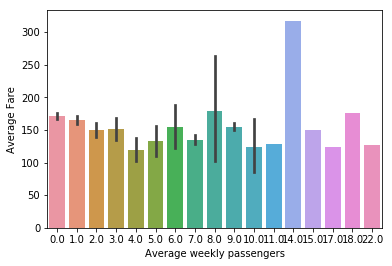

In [37]:
sns.barplot(x="Average weekly passengers", y='Average Fare', data=df)

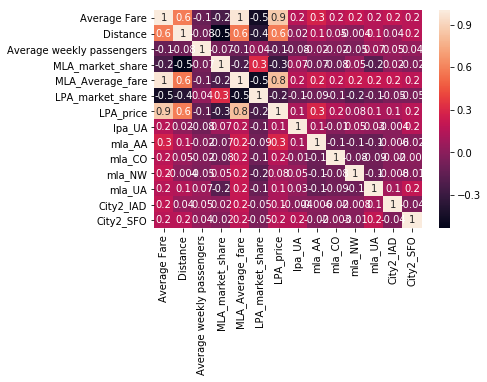

In [38]:
#lets see the correlation of dataset using heatmap
c_matrix = df.corr()
sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

### we did only normalization to the average weekly passengers column, So the result came as expected (-0.1), no change in the correlation of this column with the depedent column 

Lets drop this as of now. But It can become a feature after few transformations. I'll see if its required in the end


#### See for dependency of Average fare on MLA_Average_fare,LPA_price,Distance,MLA_market_share,LPA_market_share

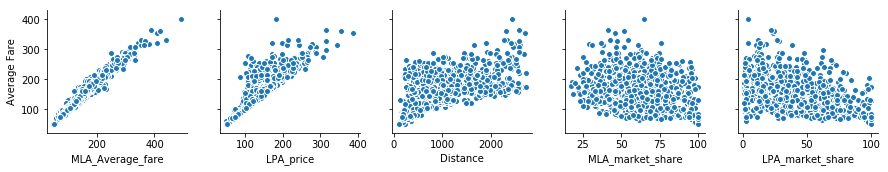

In [39]:
pp = sns.pairplot(data=df,
                  y_vars=['Average Fare'],
                  x_vars=['MLA_Average_fare', 'LPA_price','Distance','MLA_market_share','LPA_market_share'])

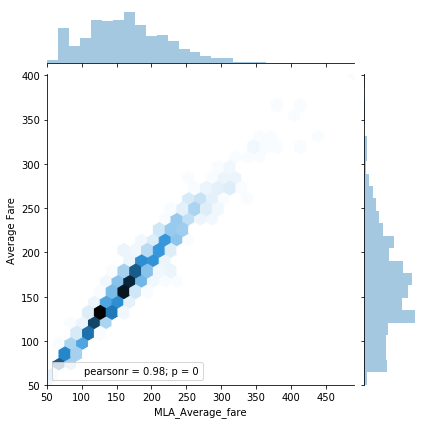

In [40]:
# MLA_Average_fare dependency on the Average Fare 
sns.jointplot(x='MLA_Average_fare', y='Average Fare', data=df,kind = 'hex')

### high pearsonr value and low p value is ideal column for final prediction.

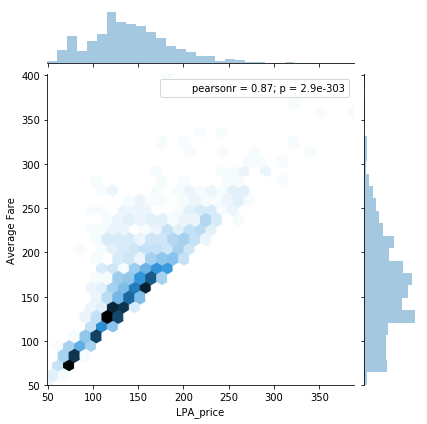

In [41]:
# LPA_price dependency on the Average Fare 
sns.jointplot(x='LPA_price', y='Average Fare', data=df,kind = 'hex')

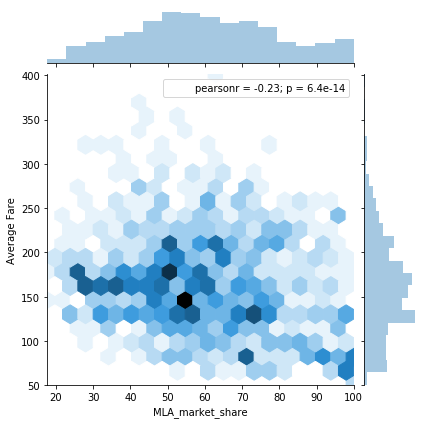

In [42]:
# MLA_market_share dependency on the Average Fare 
sns.jointplot(x='MLA_market_share', y='Average Fare', data=df,kind = 'hex')

###  lets not include MLA_market share in the final prediction based on pearsonr and p value
this confirms our heatmap evalution

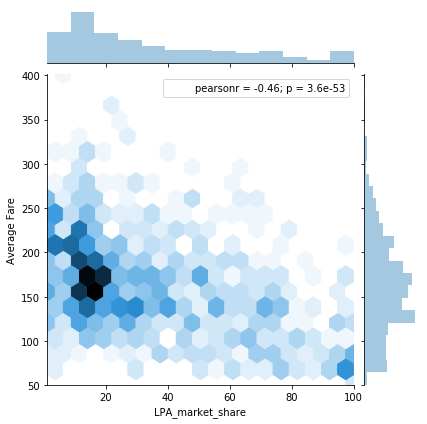

In [43]:
# LPA_market_share dependency on the Average Fare 
sns.jointplot(x='LPA_market_share', y='Average Fare', data=df,kind = 'hex')

###  lets not include LPA_market_share also in the final prediction based on pearsonr and p value
this confirms our heatmap evalution

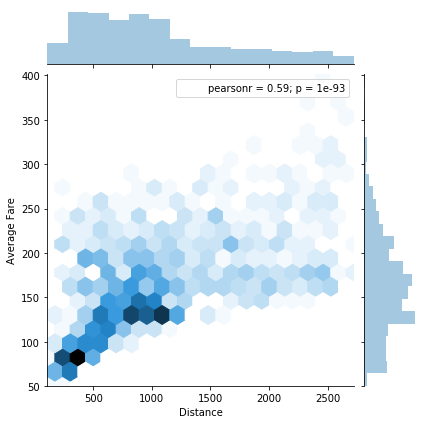

In [44]:
sns.jointplot(x='Distance', y='Average Fare', data=df,kind = 'hex')

#### Lets drop the columns which we wil not use in the further process.

In [45]:
df.drop(['market leading airline','Low price airline','City1','City2','LPA_market_share','MLA_market_share','Average weekly passengers'],axis =1,errors = True,inplace = True)

In [46]:
df.head()

,Average Fare,Distance,MLA_Average_fare,LPA_price,lpa_UA,mla_AA,mla_CO,mla_NW,mla_UA,City2_IAD,City2_SFO
0,114.47,528,111.03,111.03,0,0,0,0,0,0,0
1,122.47,860,123.09,118.94,0,0,0,0,0,0,0
2,214.42,852,223.98,167.12,0,0,0,0,0,0,0
3,69.40,288,68.86,68.86,0,0,0,0,0,0,0
4,158.13,723,161.36,145.42,0,0,0,0,1,0,0


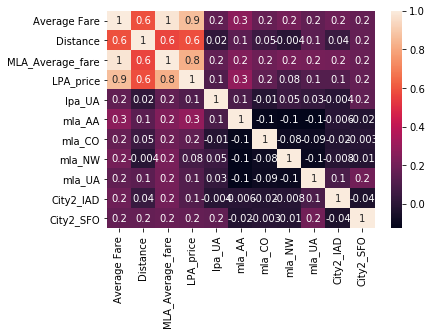

In [47]:
#Finally lets see the correlation of dataset using heatmap
c_matrix = df.corr()
sns.heatmap(c_matrix, square = False,cbar=True,fmt = '.1g',annot = True)

In [48]:
train_df, test_df = train_test_split(df,test_size = 0.20,shuffle = True, random_state = 27)

In [49]:
#finally for model columns to be used
#explicitly stating here the columns just to show(infact now be have only these column names in the dataset)
feature_cols = ['MLA_Average_fare','LPA_price','Distance','City2_IAD','City2_SFO','lpa_UA','mla_AA','mla_CO','mla_NW','mla_UA']
dependent_col = ['Average Fare']

In [50]:
#for K fold cross validation, Will do that in the end
X= df[feature_cols]
Y = df[dependent_col]

In [51]:
x= train_df[feature_cols]
y = train_df[dependent_col]
regr = linear_model.LinearRegression(normalize = True)
regr.fit(x,y)
b0 = regr.intercept_
b1 = regr.coef_
print('intercept:',b0)
print('coefficient:',b1)

intercept: [9.74169692]
coefficient: [[ 7.54716976e-01  1.82920287e-01  2.21513937e-03 -6.49241763e-01
  -6.67280203e-01  1.64117736e+00  1.94297456e+00 -3.07935938e+00
   8.31887468e-01 -7.61616567e+00]]


In [52]:
acc = r2_score(y,regr.predict(x))
MEA = mean_absolute_error(y,regr.predict(x))
n =len(x)
p = len(x.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))

print("ON TRAIN SET")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))

ON TRAIN SET
R-squared Score    : 0.97763 
Mean Absolute Error: 5.90308 
Adjusted R-Squared : 0.97735 


In [53]:
#on test set
x_test = test_df[feature_cols]
y_test = test_df[dependent_col]
y_pred = regr.predict(x_test)

In [54]:
acc = r2_score(y_test, y_pred)
MEA = mean_absolute_error(y_test, y_pred)
n =len(x_test)
p = len(x_test.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))

print("ON TEST SET")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))

ON TEST SET
R-squared Score    : 0.96487 
Mean Absolute Error: 6.40405 
Adjusted R-Squared : 0.96301 


#### check which feature is the most important one 
### Algorithm
### The idea is the following: feature importance can be measured by looking at how much the score (accuracy, F1, R^2, etc. - any score we’re interested in) decreases when a feature is not available.
reference: https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

In [55]:
pi = PermutationImportance(regr, random_state=27).fit(x_test, y_test)
eli5.show_weights(pi, feature_names = list(x_test.columns))

Weight,Feature
1.4153 ± 0.2490,MLA_Average_fare
0.0422 ± 0.0054,LPA_price
0.0054 ± 0.0029,mla_UA
0.0004 ± 0.0005,mla_CO
0.0003 ± 0.0008,mla_AA
0.0001 ± 0.0001,City2_SFO
0.0001 ± 0.0003,mla_NW
-0.0000 ± 0.0001,City2_IAD
-0.0001 ± 0.0006,lpa_UA
-0.0005 ± 0.0013,Distance


### MLA_Average_fare is the most important feature in the linear model

#### City2_IAD, lpa_UA, Distance can be removed to improve the performace as they are negatively impacting the model but they are not inpacting much.

#### Lets try the polynomial regression with degree 2 and degree 3

In [56]:
from sklearn.preprocessing import PolynomialFeatures
#degree 2
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#degree 3
polynomial_features_deg3= PolynomialFeatures(degree=3)
x_poly_deg3 = polynomial_features_deg3.fit_transform(x)

In [57]:
#degree 2
model = linear_model.LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

#degree 3
model_deg3 = linear_model.LinearRegression()
model_deg3.fit(x_poly_deg3, y)
y_poly_pred_deg3 = model_deg3.predict(x_poly_deg3)


In [58]:
acc = r2_score(y,y_poly_pred)
MEA = mean_absolute_error(y,y_poly_pred)
n =len(x)
p = len(x.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))

print("ON TRAIN SET With degree 2")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))

acc = r2_score(y,y_poly_pred_deg3)
MEA = mean_absolute_error(y,y_poly_pred_deg3)
n =len(x)
p = len(x.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))
print("---------------------------")
print("ON TRAIN SET With degree 3")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))

ON TRAIN SET With degree 2
R-squared Score    : 0.98433 
Mean Absolute Error: 4.79581 
Adjusted R-Squared : 0.98414 
---------------------------
ON TRAIN SET With degree 3
R-squared Score    : 0.98815 
Mean Absolute Error: 4.02666 
Adjusted R-Squared : 0.98800 


### It is fitting well in degree 3, but lets see wheather is is overfittiing or not.

In [59]:
x_test_poly = polynomial_features.fit_transform(x_test)
y_test_poly_pred = model.predict(x_test_poly)

In [60]:
acc = r2_score(y_test,y_test_poly_pred)
MEA = mean_absolute_error(y_test,y_test_poly_pred)
n =len(x_test)
p = len(x_test.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))

print("ON TEST SET with degree 2")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))

ON TEST SET with degree 2
R-squared Score    : 0.97298 
Mean Absolute Error: 5.89788 
Adjusted R-Squared : 0.97155 


### Conclusion From the above cell.
#### Using the polynomial regression, the adjusted R-Squared  improved from  0.96301 in linear model degree to 0.97155 with degree 2

#### train set ->degree 2 ->doing well  
#### test set  ->degree 2 -> good

#### The above configuration is just right , not overfiiting and also not underfitting



In [61]:
x_test_p = polynomial_features_deg3.fit_transform(x_test)
y_test_poly_p = model_deg3.predict(x_test_p)

acc = r2_score(y_test,y_test_poly_p)
MEA = mean_absolute_error(y_test,y_test_poly_p)
n =len(x_test)
p = len(x_test.columns)
r2_adj =1- (1-acc)*(n-1)/(n-(p+1))

print("ON TEST SET with degree 3")
print("R-squared Score    : {:0.5f} ".format(acc))
print("Mean Absolute Error: {:0.5f} ".format(MEA))
print("Adjusted R-Squared : {:0.5f} ".format(r2_adj))


ON TEST SET with degree 3
R-squared Score    : 0.73834 
Mean Absolute Error: 9.33511 
Adjusted R-Squared : 0.72449 


### Conclusion From the above cell.

#### we can see here, accuracy decreased by huge margin when we model tested with degree 3 as it is overfitting.

#### train set ->degree 3 ->doing well  
#### test set ->degree 3 ->poor 

#### The above mentioned is high variance(overfitting) problem

# K Fold

### Finally we will see the performance using the K fold cross validation


In [62]:
def get_Adj_r2_score(y_true,y_pred,n,p):
    acc = r2_score(y_true,y_pred)
    r2_adj =1- (1-acc)*(n-1)/(n-(p+1))
    return r2_adj

In [63]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
def k_fold_cross_val(folds, upto_degrees, x, y,criteria ='r2_adj' ):
    """This x and  y are local variables """
    print("Length of dataset: ",len(x))
    if criteria =='r2_adj':
        print('Criteria used: R square Adjusted')
    elif criteria =='mae':
        print('Criteria used: mean absolute error')
    
    kf = KFold(n_splits=folds)
    kf.get_n_splits(x)
    k_fold_df = pd.DataFrame(index = ["Fold "+str(i) for i in range(1, folds+1)],
                      columns = ["Degree "+str(i) for i in range (1,upto_degrees+1)])
    fold = 0
    for train_index, test_index in kf.split(x):
        fold += 1
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        kf_dict = {}
        for d in range(1, upto_degrees+1):
            polynomial_features = PolynomialFeatures(degree=d)
            linear_regression = linear_model.LinearRegression()
            model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            if criteria =='r2_adj':
                val = get_Adj_r2_score(y_test,y_pred,len(x_test),len(x_test.columns))
            elif criteria =='mae':
                val = mean_absolute_error(y_test,y_pred)
            kf_dict["Degree "+str(d)]=round(val,4)
        k_fold_df.loc["Fold "+str(fold)] = pd.Series(kf_dict)
    
    avg_dict = {}
    for col in list(k_fold_df.columns):
          avg_dict[col] = k_fold_df[col].mean()
    k_fold_df.loc["Average"] =pd.Series(avg_dict)
    return k_fold_df

In [64]:
folds = 5
upto_degrees = 3
criteria ='r2_adj'
print("Lets see the K Fold Cross Validation using {0} Fold  and upto degree {1} starting from 1 using criteria {2}".format(folds,upto_degrees,criteria))
k_fold_cross_val(folds,upto_degrees,df[feature_cols],df[dependent_col],criteria)

Lets see the K Fold Cross Validation using 5 Fold  and upto degree 3 starting from 1 using criteria r2_adj
Length of dataset:  1000
Criteria used: R square Adjusted


,Degree 1,Degree 2,Degree 3
Fold 1,0.9796,0.9852,0.9523
Fold 2,0.9645,0.9653,0.6775
Fold 3,0.9558,0.9587,0.5848
Fold 4,0.9748,0.9818,-6.8899
Fold 5,0.976,0.9777,-1.2401
Average,0.97014,0.97374,-1.18308


In [65]:
folds = 5
upto_degrees = 3
criteria ='mae'
print("Lets see the K Fold Cross Validation using {0} Fold  and upto degree {1} starting from 1 using criteria {2}".format(folds,upto_degrees,criteria))
k_fold_cross_val(folds,upto_degrees,df[feature_cols],df[dependent_col],criteria)

Lets see the K Fold Cross Validation using 5 Fold  and upto degree 3 starting from 1 using criteria mae
Length of dataset:  1000
Criteria used: mean absolute error


,Degree 1,Degree 2,Degree 3
Fold 1,5.5067,4.6764,5.8786
Fold 2,7.3253,7.1388,10.9923
Fold 3,6.8442,6.4368,9.5969
Fold 4,5.9476,4.9111,32.2909
Fold 5,5.9753,5.3894,27.462
Average,6.31982,5.7105,17.2441


#### Using  k fold cross validation degree 2 is the best parameter for the model and average performance is for R2 adjusted  is 0.97374 and Mean absolute error is 5.7105

##### For degree 3 in the train set it fitting well( not shown here) but it is overfitting, as clearly seen here.

##### I could have used neural network here, but that will easily overfit as it is a small dataset and as it is overfitting in ploynomial regression of 3 degree only.


